In [1]:
import pandas as pd
import numpy as np
import lftlib
import matplotlib.pyplot as plt
import lftfit
import lftmodels
import seaborn as sns

# simulating a forced function and testing HIX accuracy

[  21.         2899.74668926 3775.98370203 4042.69397057 4123.87562154
 4148.58580796 4156.10712966 4158.39648026 4159.09331605 4159.30541992
 2374.13528885  845.83488009  380.64862741  239.05457402  195.95597461
  182.8375616   178.84456039  177.629165    177.25922122  177.14661721]


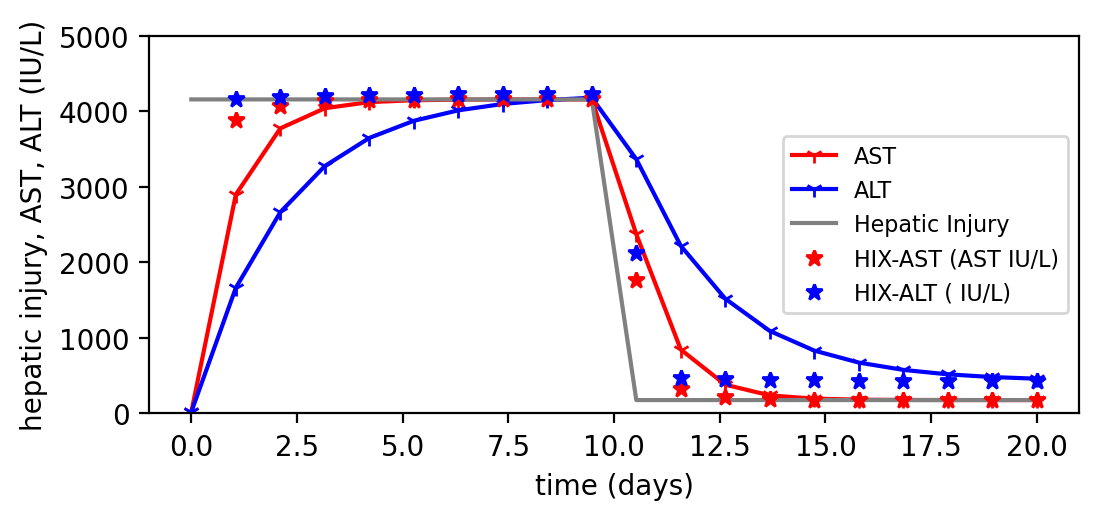

In [2]:
C=200.12 # baseline AST=24
L0=21
k=4500
tau=10
d=1.13

plt.figure(figsize=(6, 2.5), dpi=200)

t=np.linspace(start=0,stop=20,num=20)

x=lftmodels.square_impulse(t,C,L0,k,tau,d)

dL=.47

t=np.linspace(start=0,stop=20,num=20)

x=lftmodels.square_impulse(t,C,L0,k,tau,d)
xL=lftmodels.square_impulse(t,C,L0,(k-C)*dL/d,tau,dL)


t_lt_tau=t[t<tau]
t_gt_tau=t[t>=tau]
x_lt_tau=np.full(len(t_lt_tau),k/d+C/d)
x_gt_tau=np.full(len(t_gt_tau),C/d)

HIX_t, HIX = lftfit.EXP_solve_baseline(t,x,d=d, mid_t=False)
HIX_t, HIX_L = lftfit.EXP_solve_baseline(t,xL,d=dL, mid_t=False)

plt.plot(t,x,'r-1',label='AST')
plt.plot(t,xL,'b-1',label='ALT')
plt.plot(np.append(t_lt_tau,t_gt_tau),np.append(x_lt_tau,x_gt_tau),'-',color='.5',label='Hepatic Injury')

plt.xlabel('time (days)')
plt.ylabel('hepatic injury, AST, ALT (IU/L)')
plt.plot(HIX_t,HIX,'r*',label='HIX-AST (AST IU/L)')
plt.plot(HIX_t,HIX_L,'b*',label='HIX-ALT ( IU/L)')
ax = plt.gca()
ax.set_ylim([0,5000])
plt.legend(fontsize=8,loc='center right')
print(x)
# plt.savefig('figs/simulation_HIX_v_AST_ALT.pdf', dpi=300, bbox_inches="tight")
# plt.savefig('figs/simulation_HIX_v_AST_ALT.png', dpi=300, bbox_inches="tight")
# injury level is k/d + C/d (in AST units) until time tau, then injury is C/d

# diagrams paper figure

Text(0, 0.5, 'ALT (IU/L), HIX (IU/L)')

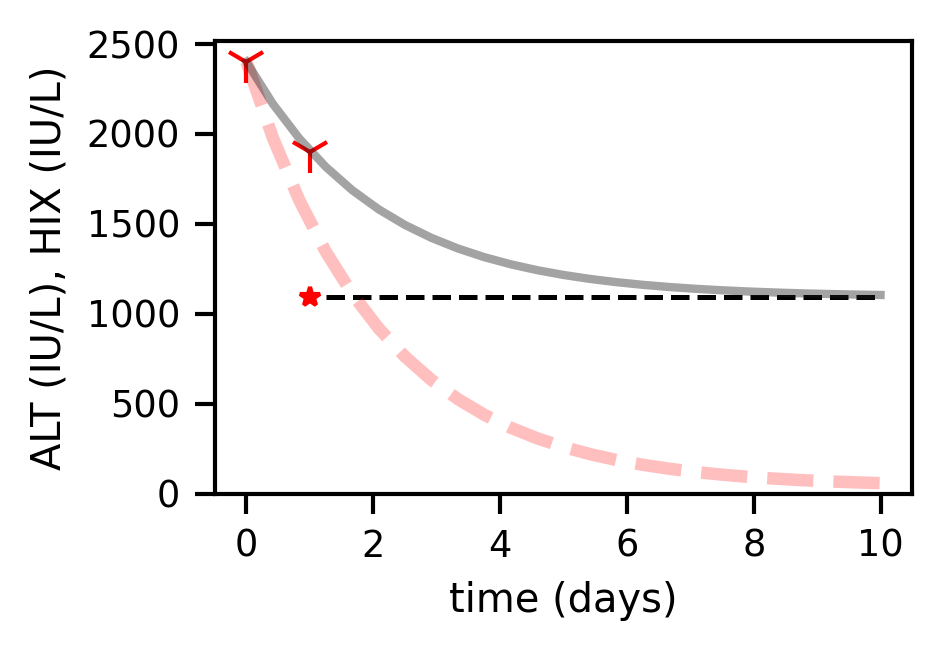

In [3]:
# sequence of pictures for animating HIX calculation
# FIGURE JUST FIRST WITH HOW HIX IS CALCULATED
plt.figure(figsize=(3, 2), dpi=300)
sns.set_context("paper")

# params
n_days=10
d_ALT=.473

# examples
# 1. injury has resolved; absolute AST and ALT are high; HIX predicts when resolution occurs
Lt=np.array([0, 1])
Lt_full=np.linspace(0,n_days,25)

xalt=np.array([2400, 1900])

complete_resolution=lftmodels.ALT_no_heps(Lt_full, xalt[0], 18, d_ALT)



# S_Ht, S_H = lftfit.EXP_solve_baseline(St,xast,d=1.14, mid_t=False)
# _, S_UL95 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL95 = lftfit.EXP_solve_baseline(St,xast,d=.65)
# _, S_UL99 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL99 = lftfit.EXP_solve_baseline(St,xast,d=.65)

L_Ht, L_H = lftfit.EXP_solve_baseline(Lt,xalt,d=d_ALT, mid_t=False)
_, L_UL95  = lftfit.EXP_solve_baseline(Lt,xalt,d=.96)
_, L_LL95 = lftfit.EXP_solve_baseline(Lt,xalt,d=.19)
_, L_UL99  = lftfit.EXP_solve_baseline(Lt,xalt,d=1.233)
_, L_LL99 = lftfit.EXP_solve_baseline(Lt,xalt,d=0.151)

hix_predict_traj=lftmodels.ALT_no_heps(Lt_full, xalt[0], L_H*d_ALT, d_ALT)

# PLOT
plt.plot(Lt,xalt,'r1',markersize=10,label='ALT lab values')
plt.plot(Lt_full,complete_resolution,'r--',linewidth=3,alpha=.25,label='trajectory if injury resolved')
plt.plot(Lt_full,hix_predict_traj, linestyle='solid',color=(.1,.1,.1),alpha=.4,linewidth=2,label='HIX trajectory')
plt.hlines(L_H,Lt[1]+.25,n_days,color='k',linestyle='--')
plt.plot(L_Ht,L_H,'r*', label='HIX value (ALT)')

ymin, ymax=plt.ylim()
xmin, xmax=plt.xlim()
plt.ylim([0,ymax])

# LABELS
plt.xlabel('time (days)')
plt.ylabel('ALT (IU/L), HIX (IU/L)')

# plt.savefig('figs/Fig3_A.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('figs/Fig3_A.png',dpi=300,bbox_inches='tight')

Text(0, 0.5, 'ALT (IU/L), HIX (IU/L)')

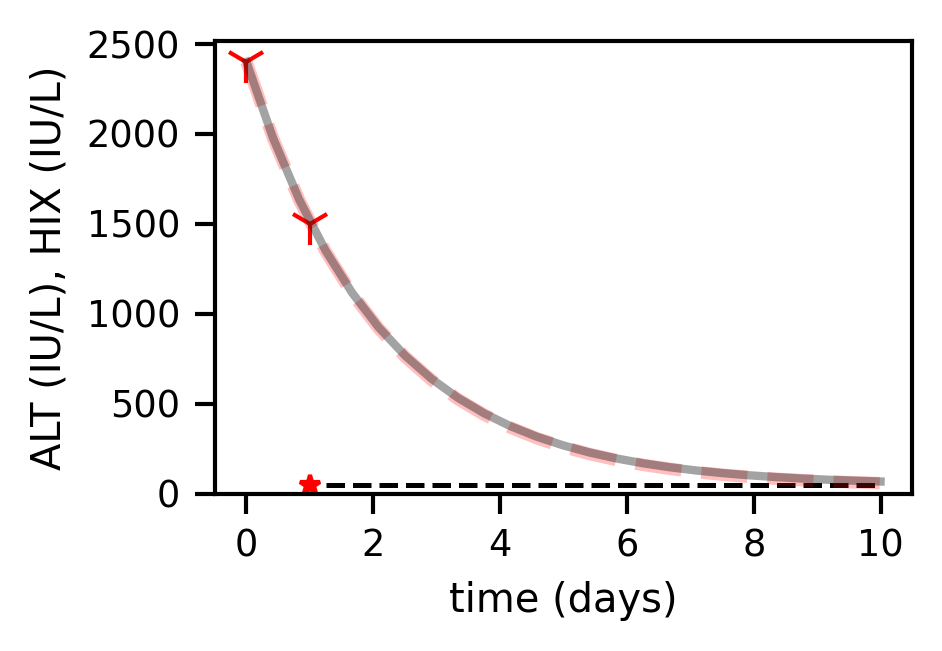

In [8]:
# sequence of pictures for animating HIX calculation
# FIGURE JUST FIRST WITH HOW HIX IS CALCULATED
plt.figure(figsize=(3, 2), dpi=300)
sns.set_context("paper")

# params
n_days=10
d_ALT=.473

# examples
# 1. injury has resolved; absolute AST and ALT are high; HIX predicts when resolution occurs
Lt=np.array([0, 1])
Lt_full=np.linspace(0,n_days,25)

xalt=np.array([2400, 1500])

complete_resolution=lftmodels.ALT_no_heps(Lt_full, xalt[0], 18, d_ALT)



# S_Ht, S_H = lftfit.EXP_solve_baseline(St,xast,d=1.14, mid_t=False)
# _, S_UL95 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL95 = lftfit.EXP_solve_baseline(St,xast,d=.65)
# _, S_UL99 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL99 = lftfit.EXP_solve_baseline(St,xast,d=.65)

L_Ht, L_H = lftfit.EXP_solve_baseline(Lt,xalt,d=d_ALT, mid_t=False)
_, L_UL95  = lftfit.EXP_solve_baseline(Lt,xalt,d=.96)
_, L_LL95 = lftfit.EXP_solve_baseline(Lt,xalt,d=.19)
_, L_UL99  = lftfit.EXP_solve_baseline(Lt,xalt,d=1.233)
_, L_LL99 = lftfit.EXP_solve_baseline(Lt,xalt,d=0.151)

hix_predict_traj=lftmodels.ALT_no_heps(Lt_full, xalt[0], L_H*d_ALT, d_ALT)

# PLOT
plt.plot(Lt,xalt,'r1',markersize=10,label='ALT lab values')
plt.plot(Lt_full,complete_resolution,'r--',linewidth=3,alpha=.25,label='trajectory if injury resolved')
plt.plot(Lt_full,hix_predict_traj, linestyle='solid',color=(.1,.1,.1),alpha=.4,linewidth=2,label='HIX trajectory')
plt.hlines(L_H,Lt[1]+.25,n_days,color='k',linestyle='--')
plt.plot(L_Ht,L_H,'r*', label='HIX value (ALT)')

ymin, ymax=plt.ylim()
xmin, xmax=plt.xlim()
plt.ylim([0,ymax])

# LABELS
plt.xlabel('time (days)')
plt.ylabel('ALT (IU/L), HIX (IU/L)')

# plt.savefig('figs/Fig3_B.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('figs/Fig3_B.png',dpi=300,bbox_inches='tight')

Text(0, 0.5, 'ALT (IU/L), HIX (IU/L)')

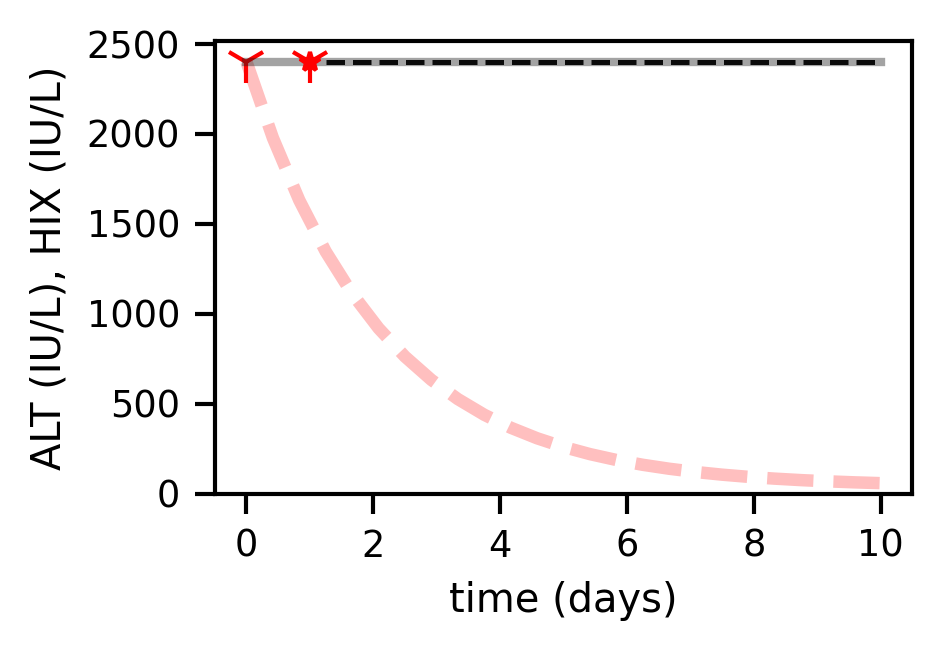

In [4]:
# sequence of pictures for animating HIX calculation
# FIGURE JUST FIRST WITH HOW HIX IS CALCULATED
plt.figure(figsize=(3, 2), dpi=300)
sns.set_context("paper")

# params
n_days=10
d_ALT=.473

# examples
# 1. injury has resolved; absolute AST and ALT are high; HIX predicts when resolution occurs
Lt=np.array([0, 1])
Lt_full=np.linspace(0,n_days,25)

xalt=np.array([2400, 2400])

complete_resolution=lftmodels.ALT_no_heps(Lt_full, xalt[0], 18, d_ALT)



# S_Ht, S_H = lftfit.EXP_solve_baseline(St,xast,d=1.14, mid_t=False)
# _, S_UL95 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL95 = lftfit.EXP_solve_baseline(St,xast,d=.65)
# _, S_UL99 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL99 = lftfit.EXP_solve_baseline(St,xast,d=.65)

L_Ht, L_H = lftfit.EXP_solve_baseline(Lt,xalt,d=d_ALT, mid_t=False)
_, L_UL95  = lftfit.EXP_solve_baseline(Lt,xalt,d=.96)
_, L_LL95 = lftfit.EXP_solve_baseline(Lt,xalt,d=.19)
_, L_UL99  = lftfit.EXP_solve_baseline(Lt,xalt,d=1.233)
_, L_LL99 = lftfit.EXP_solve_baseline(Lt,xalt,d=0.151)

hix_predict_traj=lftmodels.ALT_no_heps(Lt_full, xalt[0], L_H*d_ALT, d_ALT)

# PLOT
plt.plot(Lt,xalt,'r1',markersize=10,label='ALT lab values')
plt.plot(Lt_full,complete_resolution,'r--',linewidth=3,alpha=.25,label='trajectory if injury resolved')
plt.plot(Lt_full,hix_predict_traj, linestyle='solid',color=(.1,.1,.1),alpha=.4,linewidth=2,label='HIX trajectory')
plt.hlines(L_H,Lt[1]+.25,n_days,color='k',linestyle='--')
plt.plot(L_Ht,L_H,'r*', label='HIX value (ALT)')

ymin, ymax=plt.ylim()
xmin, xmax=plt.xlim()
plt.ylim([0,ymax])

# LABELS
plt.xlabel('time (days)')
plt.ylabel('ALT (IU/L), HIX (IU/L)')

# plt.savefig('figs/Fig3_C.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('figs/Fig3_C.png',dpi=300,bbox_inches='tight')

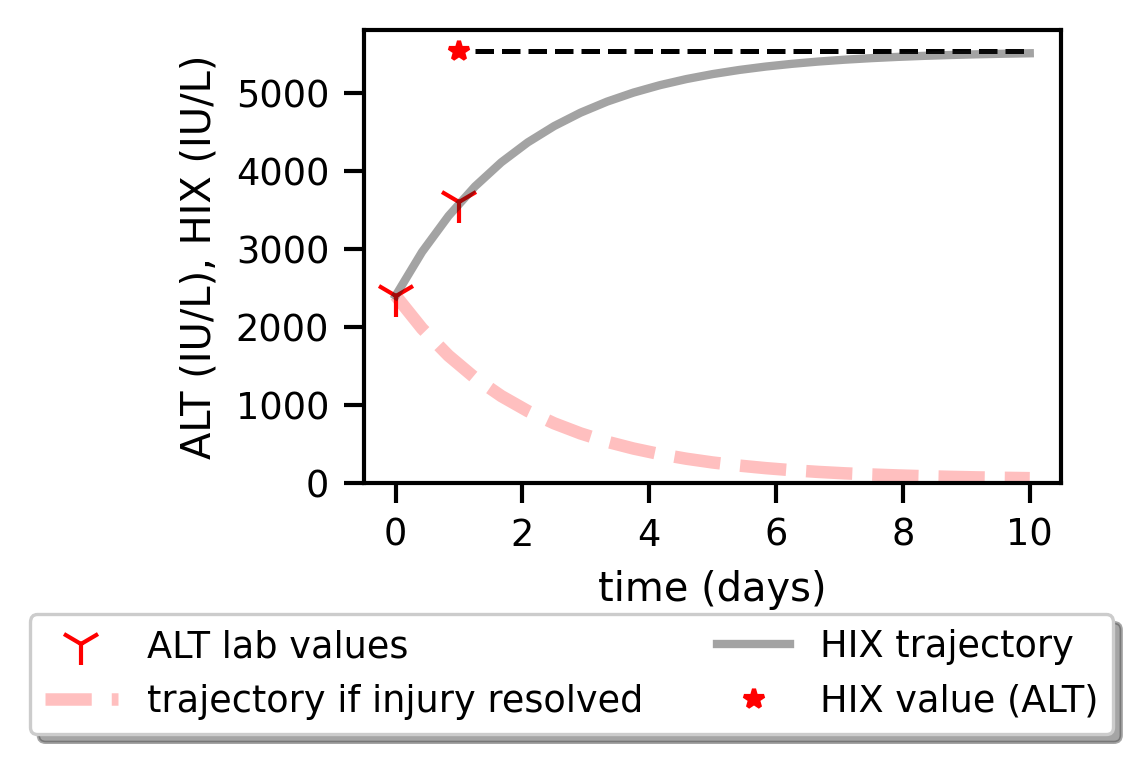

In [5]:
# sequence of pictures for animating HIX calculation
# FIGURE JUST FIRST WITH HOW HIX IS CALCULATED
plt.figure(figsize=(3, 2), dpi=300)
sns.set_context("paper")

# params
n_days=10
d_ALT=.473

# examples
# 1. injury has resolved; absolute AST and ALT are high; HIX predicts when resolution occurs
Lt=np.array([0, 1])
Lt_full=np.linspace(0,n_days,25)

xalt=np.array([2400, 3600])

complete_resolution=lftmodels.ALT_no_heps(Lt_full, xalt[0], 18, d_ALT)



# S_Ht, S_H = lftfit.EXP_solve_baseline(St,xast,d=1.14, mid_t=False)
# _, S_UL95 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL95 = lftfit.EXP_solve_baseline(St,xast,d=.65)
# _, S_UL99 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
# _, S_LL99 = lftfit.EXP_solve_baseline(St,xast,d=.65)

L_Ht, L_H = lftfit.EXP_solve_baseline(Lt,xalt,d=d_ALT, mid_t=False)
_, L_UL95  = lftfit.EXP_solve_baseline(Lt,xalt,d=.96)
_, L_LL95 = lftfit.EXP_solve_baseline(Lt,xalt,d=.19)
_, L_UL99  = lftfit.EXP_solve_baseline(Lt,xalt,d=1.233)
_, L_LL99 = lftfit.EXP_solve_baseline(Lt,xalt,d=0.151)

hix_predict_traj=lftmodels.ALT_no_heps(Lt_full, xalt[0], L_H*d_ALT, d_ALT)

# PLOT
plt.plot(Lt,xalt,'r1',markersize=10,label='ALT lab values')
plt.plot(Lt_full,complete_resolution,'r--',linewidth=3,alpha=.25,label='trajectory if injury resolved')
plt.plot(Lt_full,hix_predict_traj, linestyle='solid',color=(.1,.1,.1),alpha=.4,linewidth=2,label='HIX trajectory')
plt.hlines(L_H,Lt[1]+.25,n_days,color='k',linestyle='--')
plt.plot(L_Ht,L_H,'r*', label='HIX value (ALT)')

ymin, ymax=plt.ylim()
xmin, xmax=plt.xlim()
plt.ylim([0,ymax])

# LABELS
plt.xlabel('time (days)')
plt.ylabel('ALT (IU/L), HIX (IU/L)')

plt.legend(bbox_to_anchor=(1.1, -.25),
          ncol=2, fancybox=True, shadow=True)

# plt.savefig('figs/Fig3_D.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('figs/Fig3_D.png',dpi=300,bbox_inches='tight')



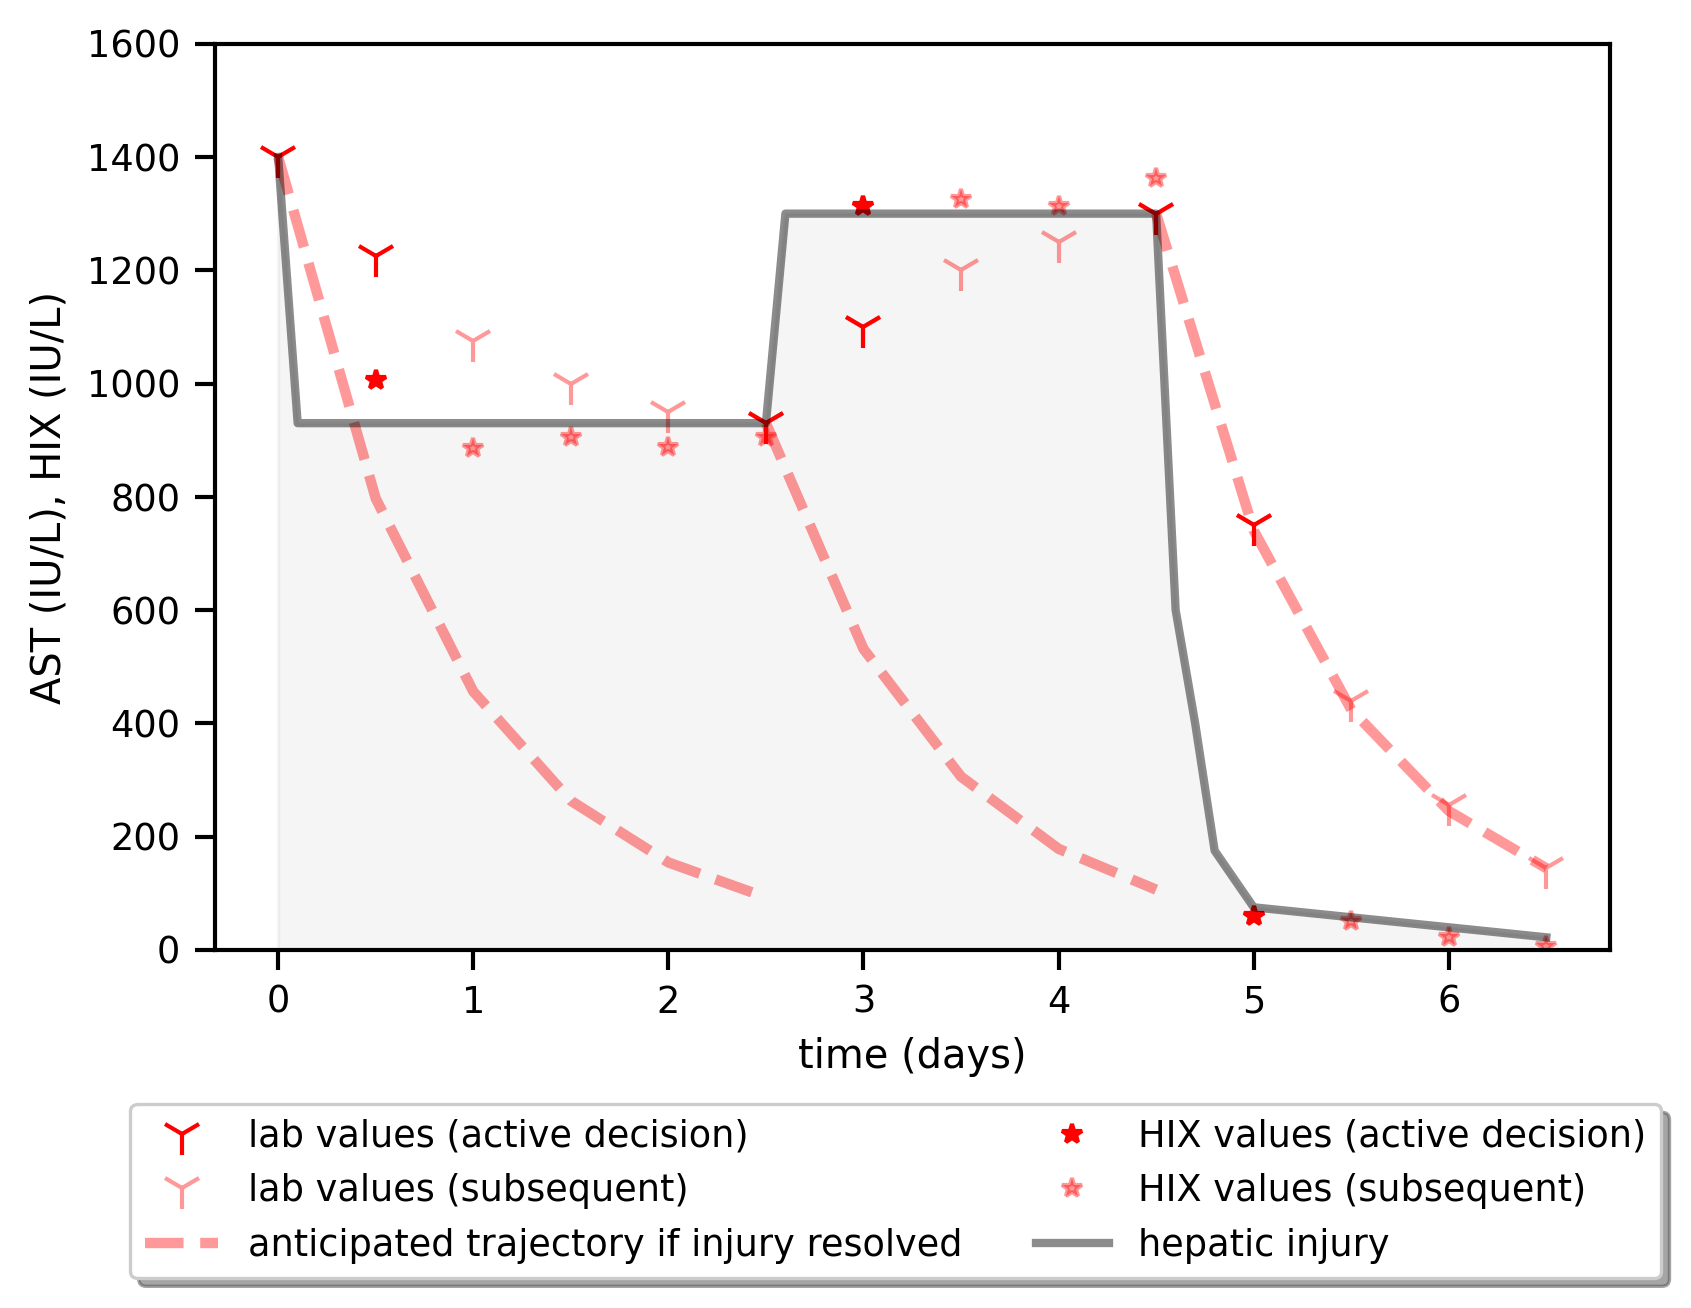

In [6]:
# FIGURE JUST FIRST WITH HOW HIX IS CALCULATED
plt.figure(figsize=(6, 4), dpi=300)
# 1. injury has resolved; absolute AST and ALT are high; HIX predicts when resolution occurs
St=np.array([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
Lt=St

xast=np.array([1400, 1225, 1075, 1000, 950, 930, 1100, 1200, 1250, 1300, 750, 440, 255, 145])
xalt=xast

hep=[1400, 930, 930,1300, 1300,600,400,175,125,75,22]
hept=[0, .1, 2.5,2.6,4.5, 4.6,4.7,4.8,4.9,5,6.5]

complete_resolution=lftmodels.ALT_no_heps(St, xast[0], 14, 1.14)
activeagain=lftmodels.ALT_no_heps(St[5:]-St[5], xast[5], 14, 1.14)
resolve=lftmodels.ALT_no_heps(St[9:]-St[9], xast[9], 14, 1.14)

S_Ht, S_H = lftfit.EXP_solve_baseline(St,xast,d=1.14, mid_t=False)
_, S_UL95 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
_, S_LL95 = lftfit.EXP_solve_baseline(St,xast,d=.65)
_, S_UL99 = lftfit.EXP_solve_baseline(St,xast,d=1.886)
_, S_LL99 = lftfit.EXP_solve_baseline(St,xast,d=.65)

L_Ht, L_H = lftfit.EXP_solve_baseline(Lt,xalt,d=.473, mid_t=False)
_, L_UL95  = lftfit.EXP_solve_baseline(Lt,xalt,d=.96)
_, L_LL95 = lftfit.EXP_solve_baseline(Lt,xalt,d=.19)
_, L_UL99  = lftfit.EXP_solve_baseline(Lt,xalt,d=1.233)
_, L_LL99 = lftfit.EXP_solve_baseline(Lt,xalt,d=0.151)

St1=St[0:2]
xast1=xast[0:2]
St2=St[2:]
xast2=xast[2:]
St3=St[5:7]
xast3=xast[5:7]
St4=St[9:11]
xast4=xast[9:11]

S_Ht1=S_Ht[0:1]
S_H1=S_H[0:1]
S_Ht2=S_Ht[1:]
S_H2=S_H[1:]
S_Ht3=S_Ht[5:6]
S_H3=S_H[5:6]
S_Ht3=S_Ht[5:6]
S_H3=S_H[5:6]
S_Ht4=S_Ht[9:10]
S_H4=S_H[9:10]



St2=St[2:]
xast2=xast[2:]

S_Ht1=S_Ht[0:1]
S_H1=S_H[0:1]
S_Ht2=S_Ht[1:]
S_H2=S_H[1:]
plt.plot(St1,xast1,'r1',markersize=10,label='lab values (active decision)')
plt.plot(St2,xast2,'r1',markersize=10,alpha=.4,label='lab values (subsequent)')
plt.plot(St3,xast3,'r1',markersize=10)
plt.plot(St4,xast4,'r1',markersize=10)
# plt.plot(St4,xast2,'r1',markersize=10,alpha=.4)
plt.plot(St[0:6],complete_resolution[0:6],'r--',linewidth=2.5,alpha=.4,label='anticipated trajectory if injury resolved')
plt.plot(St[5:10],activeagain[:-4],'r--',linewidth=2.5,alpha=.4)
plt.plot(St[9:],resolve,'r--',linewidth=2.5,alpha=.4)
# plt.plot(Lt,xalt,'b1')
# plt.plot(L_Ht,L_H,'b*')
# plt.fill_between(L_Ht, L_LL99, L_UL99,
#              color='blue', alpha=0.2)
plt.plot(S_Ht1,S_H1,'r*', label='HIX values (active decision)')
plt.plot(S_Ht2,S_H2,'r*',alpha=.4, label='HIX values (subsequent)')
plt.plot(S_Ht3,S_H3,'r*')
plt.plot(S_Ht4,S_H4,'r*')
plt.plot(hept, hep,'k-',alpha=.45,linewidth=2,label='hepatic injury')
plt.fill_between(hept, 0, hep,
          color='black', alpha=0.04)
ymin, ymax=plt.ylim()
xmin, xmax=plt.xlim()
plt.ylim([0,ymax])
# plt.plot(bx,ymax*.6,'kv', label='liver biopsy',alpha=.4)
# plt.vlines(bx,0,ymax*.6,linestyles='--', alpha=.4)
#str_path = str(list_mrn[i]) + '\n\n'

#                 str_path = list_finaldx[i].upper().replace('\r',' ')
#                     str_path = list_fullpath[i].upper().replace('\r',' ')

plt.xlabel('time (days)')
plt.ylabel('AST (IU/L), HIX (IU/L)')
plt.ylim([0,1600])
plt.legend(bbox_to_anchor=(1.05, -.15),
          ncol=2, fancybox=True, shadow=True)
# plt.show()

# plt.savefig('figs/simulation_HIX_examples_with_injury.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('figs/simulation_HIX_examples_with_injury.png',dpi=300,bbox_inches='tight')